Leaky features helps the model to cheat

It's also important for us to drop any columns that would constitute leakage, that is, features that were created using our target or that would give our model information that it won't have access to when it's deployed.

In [ ]:
# Calculating number of unique values for non numeric feature
df.select_dtypes("object").nunique()

<div class="alert alert-block alert-info">
<b>Tip:</b> Don't try to satisfy all the criteria in the first version of your <code>wrangle</code> function. Instead, work iteratively. Start with the first criteria, test it out with one of the Mexico CSV files in the <code>data/</code> directory, and submit it to the grader for feedback. Then add the next criteria.</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error

In [3]:
# Get current working directory
os.getcwd()

'C:\\Users\\USER\\Downloads\\House_Prices_Prediction'

In [4]:
%pwd

'C:\\Users\\USER\\Downloads\\House_Prices_Prediction'

In [5]:
# load dataset
prop = pd.read_csv('./Properties1.csv')
prop.head()

,title,description,bedrooms,bathrooms,toilets,location,city,price
0,5 Bedrooms Detached House + 1 Room BQ,5 Bedroom House,5,5,6,"Joel Ogunnaike Street Gra, Ikeja , Ikeja",Ikeja,7500000
1,Nice 3 Bedroom Apartment in a Secured Estate,3 Bedroom Flat & Apartment,3,3,4,"Banana Island, Ikoyi",Ikoyi,15000000
2,Luxury Flats and Apartments along Banana Islan...,3 Bedroom Flat & Apartment,3,3,4,"Banana Island Road, Ikoyi, Banana Island, Ikoyi",Ikoyi,15000000
3,Luxury 3 Bedroom Flat with Excellent Facilities,3 Bedroom Flat & Apartment,3,3,4,Ikoyi,Ikoyi,10000000
4,Direct Payment Ready Clients - Waterfront 3 Be...,3 Bedroom Flat & Apartment,3,3,4,"Banana Island Estate, Banana Island, Ikoyi",Ikoyi,16000000


In [6]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9979 entries, 0 to 9978
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9979 non-null   object
 1   description  9979 non-null   object
 2   bedrooms     9979 non-null   int64 
 3   bathrooms    9979 non-null   int64 
 4   toilets      9979 non-null   int64 
 5   location     9979 non-null   object
 6   city         9979 non-null   object
 7   price        9979 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 623.8+ KB


In [7]:
prop.describe()

,bedrooms,bathrooms,toilets,price
count,9979.000000,9979.000000,9979.000000,9.979000e+03
mean,2.482112,2.602565,3.306043,1.061530e+07
std,1.332164,1.338476,1.589242,2.294811e+08
min,0.000000,0.000000,1.000000,0.000000e+00
25%,2.000000,1.000000,2.000000,1.300000e+06
50%,3.000000,3.000000,4.000000,3.500000e+06
75%,3.000000,3.000000,4.000000,7.500000e+06
max,8.000000,8.000000,9.000000,1.500000e+10


In [8]:
prop['description'].unique()

array(['5 Bedroom House', '3 Bedroom Flat & Apartment',
       '4 Bedroom Duplex', '4 Bedroom Terrace',
       '4 Bedroom Flat & Apartment', '3 Bedroom Terrace',
       '2 Bedroom Flat & Apartment', 'Office', '4 Bedroom Townhouse',
       'Flat & Apartment', 'Bungalow', '5 Bedroom Duplex',
       '4 Bedroom House', '2 Bedroom Bungalow', '3 Bedroom Duplex',
       '6 Bedroom Duplex', 'Commercial Property', '5 Bedroom Terrace',
       '3 Bedroom House', '7 Bedroom Duplex', 'Warehouse',
       '3 Bedroom Bungalow', '5 Bedroom Flat & Apartment',
       '2 Bedroom Terrace', '7 Bedroom House', 'Hotel',
       '5 Bedroom Bungalow', '6 Bedroom House', '2 Bedroom House', 'Shop',
       '2 Bedroom Duplex', 'House', '5 Bedroom Townhouse',
       '4 Bedroom Bungalow', '6 Bedroom Terrace',
       '5 Bedroom Commercial Property', '2 Bedroom Commercial Property',
       '5 Bedroom Office', '3 Bedroom Townhouse', '4 Bedroom Office',
       '7 Bedroom Flat & Apartment', 'Terrace',
       '4 Bedroom Com

In [10]:
def island_flag(prop):
    if (prop['city']=='Lekki') or (prop['city']=='Victoria Island') or (prop['city']=='Ajah') \
     or (prop['city']=='Ikoyi') or (prop['city']=='Eko Atlantic City') or (prop['city']=='Epe') or (prop['city']=='Lagos Island'):
        return 1
    else:
        return 0

In [11]:
prop['island_flag'] = prop.apply(island_flag, axis=1)

In [13]:
prop['island_flag'].value_counts()

1    8264
0    1715
Name: island_flag, dtype: int64

In [14]:
#create new features
prop['estate_flag'] = prop['location'].apply(lambda x: len([c for c in str(x).lower().split() if "estate" in c]))
prop['terrace_flag'] = prop['title'].apply(lambda x: len([c for c in str(x).lower().split() if "terraced" 
                                                                  in c or "terrace" in c or "detached" in c
                                                                 or "duplex" in c]))
prop['luxury_flag'] = prop['title'].apply(lambda x: len([c for c in str(x).lower().split()
                                                              if "new" in c or "luxury" in c or "newly" in c
                                                              or "executive" in c or "luxurious" in c
                                                                        or "renovated" in c]))
prop['serviced_flag'] = prop['title'].apply(lambda x: len([c for c in str(x).lower().split()
                                                                           if "serviced" in c or "studio" in c]))
prop['miniflat_flag'] = prop['description'].apply(lambda x: len([c for c in str(x).lower().split() if "mini" in c]))
prop['selfcontain_flag'] = prop['description'].apply(lambda x: len([c for c in str(x).lower().split() if "self" in c]))

In [15]:
prop.head(2)

,title,description,bedrooms,bathrooms,toilets,location,city,price,estate_flag,terrace_flag,luxury_flag,serviced_flag,miniflat_flag,selfcontain_flag,island_flag
0,5 Bedrooms Detached House + 1 Room BQ,5 Bedroom House,5,5,6,"Joel Ogunnaike Street Gra, Ikeja , Ikeja",Ikeja,7500000,0,1,0,0,0,0,0
1,Nice 3 Bedroom Apartment in a Secured Estate,3 Bedroom Flat & Apartment,3,3,4,"Banana Island, Ikoyi",Ikoyi,15000000,0,0,0,0,0,0,1


In [16]:
prop2 = prop.drop(['title', 'description', 'location'], axis='columns')
prop2.head()

,bedrooms,bathrooms,toilets,city,price,estate_flag,terrace_flag,luxury_flag,serviced_flag,miniflat_flag,selfcontain_flag,island_flag
0,5,5,6,Ikeja,7500000,0,1,0,0,0,0,0
1,3,3,4,Ikoyi,15000000,0,0,0,0,0,0,1
2,3,3,4,Ikoyi,15000000,0,0,1,0,0,0,1
3,3,3,4,Ikoyi,10000000,0,0,1,0,0,0,1
4,3,3,4,Ikoyi,16000000,1,0,0,0,0,0,1


In [17]:
prop['bedrooms'].unique()

array([5, 3, 4, 2, 0, 1, 6, 7, 8], dtype=int64)

In [18]:
corr= prop.corr()
corr

,bedrooms,bathrooms,toilets,price,estate_flag,terrace_flag,luxury_flag,serviced_flag,miniflat_flag,selfcontain_flag,island_flag
bedrooms,1.000000,0.932754,0.941154,0.026483,-0.015141,0.491217,0.059840,-0.039492,-0.405092,-0.478761,0.144135
bathrooms,0.932754,1.000000,0.950432,0.023878,-0.000095,0.501677,0.060742,-0.020635,-0.435949,-0.307652,0.163019
toilets,0.941154,0.950432,1.000000,0.037202,-0.024270,0.494056,0.044231,-0.026878,-0.528333,-0.366046,0.176487
price,0.026483,0.023878,0.037202,1.000000,-0.012025,-0.003323,-0.013387,-0.007020,-0.014058,-0.010722,0.014313
estate_flag,-0.015141,-0.000095,-0.024270,-0.012025,1.000000,-0.030893,0.059907,-0.029261,0.031629,0.046982,-0.004984
terrace_flag,0.491217,0.501677,0.494056,-0.003323,-0.030893,1.000000,-0.098382,-0.075800,-0.150352,-0.092461,0.112284
luxury_flag,0.059840,0.060742,0.044231,-0.013387,0.059907,-0.098382,1.000000,0.010557,-0.002045,-0.082246,-0.047389
serviced_flag,-0.039492,-0.020635,-0.026878,-0.007020,-0.029261,-0.075800,0.010557,1.000000,-0.015421,0.046092,0.087553
miniflat_flag,-0.405092,-0.435949,-0.528333,-0.014058,0.031629,-0.150352,-0.002045,-0.015421,1.000000,-0.093550,-0.054754
selfcontain_flag,-0.478761,-0.307652,-0.366046,-0.010722,0.046982,-0.092461,-0.082246,0.046092,-0.093550,1.000000,-0.001973


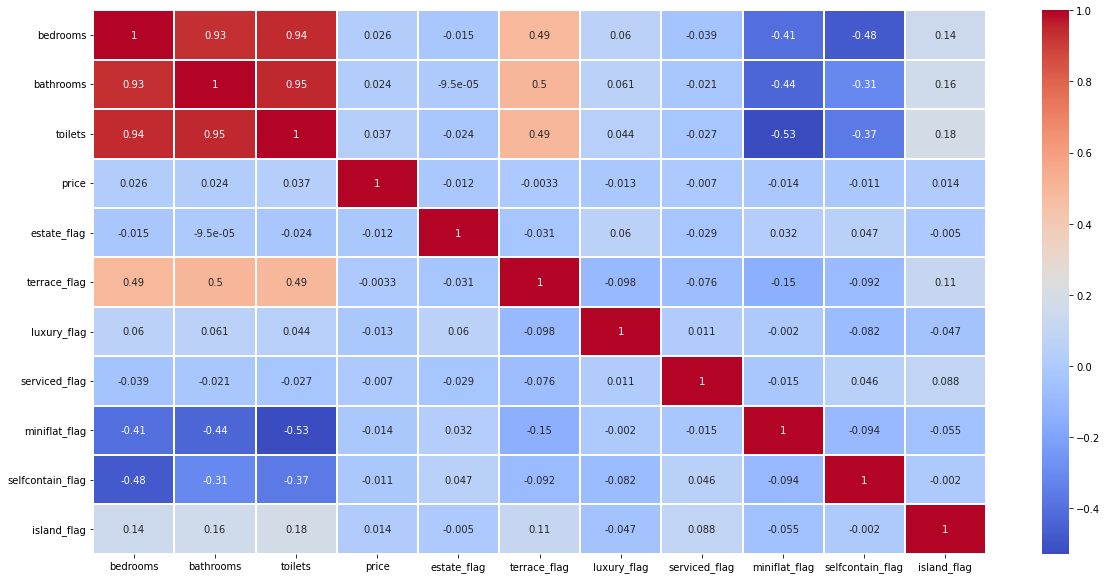

In [20]:
#corr
plt.figure(figsize=(20, 10))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True);

In [21]:
prop2.isna().sum()

bedrooms            0
bathrooms           0
toilets             0
city                0
price               0
estate_flag         0
terrace_flag        0
luxury_flag         0
serviced_flag       0
miniflat_flag       0
selfcontain_flag    0
island_flag         0
dtype: int64

In [22]:
def unique_(data, cols):
    for each in cols:
        x = data[each].unique()
        print("Unique values in", each, "column",x)

In [23]:
col = ['bedrooms', 'bathrooms', 'toilets']

In [24]:
unique_(prop2, col)

Unique values in bedrooms column [5 3 4 2 0 1 6 7 8]
Unique values in bathrooms column [5 3 4 2 0 1 6 7 8]
Unique values in toilets column [6 4 5 3 1 2 7 8 9]


In [25]:
prop2['city'].unique()

array(['Ikeja', 'Ikoyi', 'Victoria Island', 'Lekki', 'Ajah', 'Abuja',
       'Ibadan', 'Lagos Extension', 'Oshodi', 'Agege', 'Gbagada', 'Ketu',
       'Yaba', 'Isolo', 'Festac', 'Ikorodu Road', 'Surulere', 'Mushin',
       'Ogun', 'Port Harcourt', 'North', 'Maryland', 'Ogudu', 'Ikorodu',
       'Shomolu', 'Magodo', 'Ilupeju', 'Odofin', 'Ojodu', 'Ojota',
       'Kosofe', 'Ijede', 'Ayobo', 'Ipaja', 'Ikotun', 'Eko Atlantic City',
       'Alimosho', 'Ojo', 'Ifako-Ijaiye', 'Ijaiye', 'Epe', 'Island',
       'Idimu', 'Apapa'], dtype=object)

In [26]:
city_stats = prop2.groupby('city')['city'].agg('count').sort_values(ascending=False)
city_stats

city
Lekki                3764
Ikoyi                2348
Ajah                 1313
Victoria Island       816
Ikeja                 334
Yaba                  210
Surulere              156
Gbagada               110
Magodo                107
Ikorodu                96
Isolo                  83
Abuja                  76
Shomolu                68
Ketu                   48
Ojodu                  47
Maryland               43
Ogudu                  41
Ipaja                  40
Agege                  40
North                  39
Ibadan                 36
Odofin                 23
Alimosho               17
Ayobo                  17
Eko Atlantic City      13
Ikotun                 11
Epe                    10
Ojo                    10
Ilupeju                 9
Oshodi                  8
Ikorodu Road            7
Ifako-Ijaiye            6
Lagos Extension         6
Island                  5
Kosofe                  4
Ojota                   4
Mushin                  3
Apapa                   3
Ijaiye 

In [27]:
property_price = []
import numpy as np
for location in ['Ikoyi', 'Lekki', 'Ajah', 'Victoria Island', 'Shomolu', 'Maryland',
       'Surulere', 'Odofin', 'Ojodu', 'Yaba', 'Gbagada', 'Ikeja', 'Ojota',
       'Kosofe', 'Magodo', 'Agege', 'Ikorodu', 'Ketu', 'Ogudu', 'North',
       'Ilupeju', 'Isolo', 'Mushin', 'Ijede', 'Ayobo', 'Ipaja', 'Ikotun',
       'City', 'Alimosho', 'Ojo', 'Ifako-Ijaiye', 'Isheri', 'Ijaiye',
       'Epe', 'Island', 'Oshodi', 'Idimu', 'Apapa']:
    for i in range(1,6):
        d = {}
        d['city'] = location
        d['bedspace'] = i
        try:
            d['price_per_bedroom'] = np.percentile(prop2['price'][(prop2['city']==location)&(prop2['bedrooms']==i)],50)
        except (IndexError,TypeError) as e:
            d['price_per_bedroom'] = 0
        property_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(prop2['price'][(prop2['city']==location)&(prop2['bedrooms']==i)],50))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in Ikoyi :  4000000.0
This is the median for 2 bedroom in Ikoyi :  8000000.0
This is the median for 3 bedroom in Ikoyi :  11000000.0
This is the median for 4 bedroom in Ikoyi :  13000000.0
This is the median for 5 bedroom in Ikoyi :  20000000.0
This is the median for 1 bedroom in Lekki :  1500000.0
This is the median for 2 bedroom in Lekki :  2500000.0
This is the median for 3 bedroom in Lekki :  3500000.0
This is the median for 4 bedroom in Lekki :  4500000.0
This is the median for 5 bedroom in Lekki :  6500000.0
This is the median for 1 bedroom in Ajah :  700000.0
This is the median for 2 bedroom in Ajah :  1200000.0
This is the median for 3 bedroom in Ajah :  1500000.0
This is the median for 4 bedroom in Ajah :  3000000.0
This is the median for 5 bedroom in Ajah :  4500000.0
This is the median for 1 bedroom in Victoria Island :  3000000.0
This is the median for 2 bedroom in Victoria Island :  5000000.0
This is the median for 3 bedroom in Victoria Isl

This is the median for 5 bedroom in Epe :  0
This is the median for 1 bedroom in Island :  25000.0
This is the median for 2 bedroom in Island :  1200000.0
This is the median for 3 bedroom in Island :  1400000.0
This is the median for 4 bedroom in Island :  0
This is the median for 5 bedroom in Island :  0
This is the median for 1 bedroom in Oshodi :  0
This is the median for 2 bedroom in Oshodi :  1000000.0
This is the median for 3 bedroom in Oshodi :  1200000.0
This is the median for 4 bedroom in Oshodi :  3800000.0
This is the median for 5 bedroom in Oshodi :  0
This is the median for 1 bedroom in Idimu :  0
This is the median for 2 bedroom in Idimu :  700000.0
This is the median for 3 bedroom in Idimu :  0
This is the median for 4 bedroom in Idimu :  0
This is the median for 5 bedroom in Idimu :  0
This is the median for 1 bedroom in Apapa :  0
This is the median for 2 bedroom in Apapa :  0
This is the median for 3 bedroom in Apapa :  4000000.0
This is the median for 4 bedroom in Ap

In [28]:
pd.DataFrame(property_price)

,city,bedspace,price_per_bedroom
0,Ikoyi,1,4000000.0
1,Ikoyi,2,8000000.0
2,Ikoyi,3,11000000.0
3,Ikoyi,4,13000000.0
4,Ikoyi,5,20000000.0
...,...,...,...
185,Apapa,1,0.0
186,Apapa,2,0.0
187,Apapa,3,4000000.0
188,Apapa,4,4000000.0


In [29]:
#save the output in a dataframe and in order to merge with original dataframe
property_price=pd.DataFrame(property_price)
property_price['locationbed'] = property_price['city'] + property_price['bedspace'].astype(str)
property_price = property_price.drop(["city","bedspace"],axis=1)
property_price.head()

,price_per_bedroom,locationbed
0,4000000.0,Ikoyi1
1,8000000.0,Ikoyi2
2,11000000.0,Ikoyi3
3,13000000.0,Ikoyi4
4,20000000.0,Ikoyi5


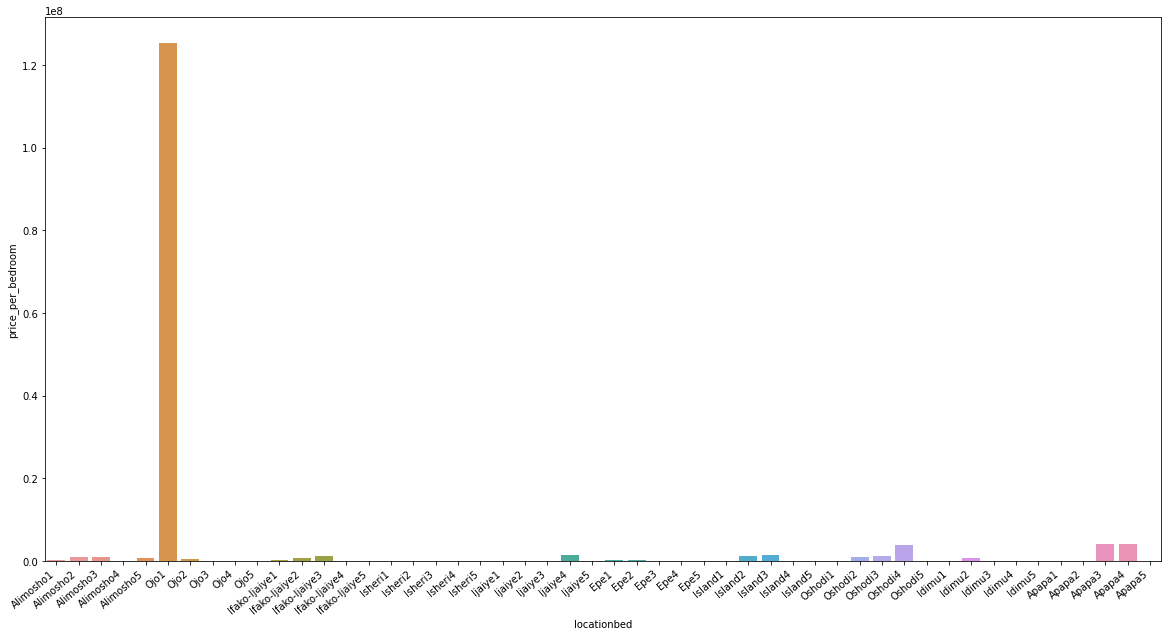

In [30]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y='price_per_bedroom', x='locationbed', data=property_price.tail(50))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Removing Outliers

In [31]:
prop.groupby('city')['price'].max().sort_values(ascending=False)

city
Ikoyi                15000000000
Victoria Island       8000000000
Lekki                 3000000000
Ajah                   850000000
Ikeja                  450000000
Ojo                    250000000
Ketu                   170000000
Port Harcourt          120000000
Abuja                   60000000
Magodo                  55000000
Isolo                   50000000
Ibadan                  49000000
Mushin                  30000000
Eko Atlantic City       30000000
Ikorodu Road            30000000
Ogun                    15000000
Oshodi                  15000000
Lagos Extension         14000000
Yaba                    13000000
Surulere                10000000
Ilupeju                  9200000
Maryland                 7000000
Festac                   5100000
Gbagada                  4800000
Apapa                    4000000
Ogudu                    3600000
North                    3000000
Shomolu                  3000000
Agege                    2500000
Ojodu                    2500000
Odofi

### These Prices are too high for rent. These are outliers

In [32]:
prop2.shape

(9979, 12)

In [87]:
prop3 = prop2[~(prop2['price']>10000000)]

In [88]:
prop3.shape

(8266, 12)

In [89]:
prop4 = prop3[~(prop3['bedrooms']>=5)]
prop4.shape

(7967, 12)

In [90]:
prop5 = prop4[~(prop4['bathrooms']>=4)]
prop5.shape

(6632, 12)

In [91]:
prop6 = prop5[~(prop5['toilets']>=5)]
prop6.shape

(6622, 12)

In [92]:
def create_distplot(data,col):
    for i in range(len(col)):
        plt.figure()
        plot = data[col[i]].plot(kind='hist')
        plt.title(col[i])
        plt.show()

In [93]:
cols = ['bedrooms', 'bathrooms', 'toilets', 'price']

In [94]:
data = prop6.loc[:,['bedrooms', 'bathrooms', 'toilets', 'price']]

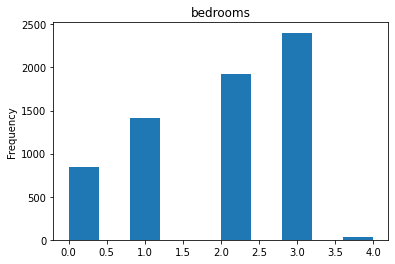

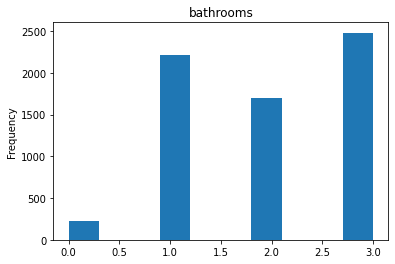

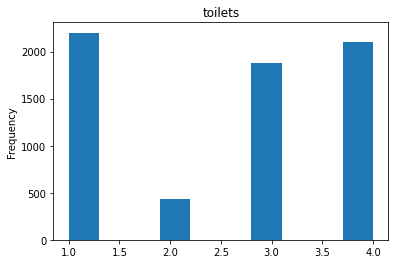

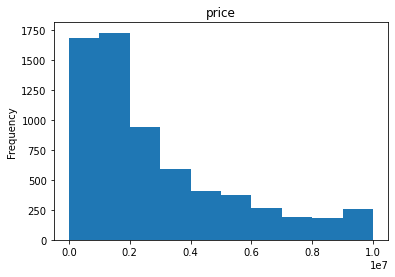

In [96]:
create_distplot(data, cols)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

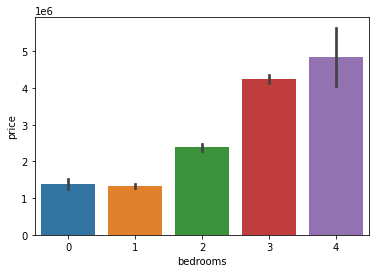

In [97]:
sns.barplot(x='bedrooms',y='price',data=prop6)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

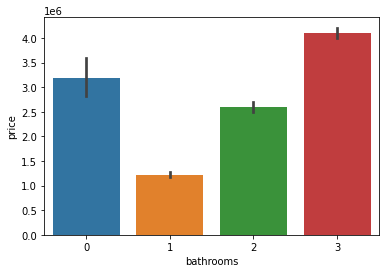

In [99]:
sns.barplot(x='bathrooms',y='price',data=prop6)

### Also, we check if number of bathrooms is greater than bedrooms and also if number of toilets is less than bathrooms

In [100]:
prop6.shape

(6622, 12)

In [101]:
prop7 = prop6[~(prop6['bathrooms']>prop6['bedrooms']+2)]

In [102]:
prop7.shape

(6622, 12)

In [103]:
prop8 = prop7[~(prop7['bathrooms']>prop7['toilets']+2)]

In [104]:
prop8.shape

(6622, 12)

In [105]:
prop8.head()

,bedrooms,bathrooms,toilets,city,price,estate_flag,terrace_flag,luxury_flag,serviced_flag,miniflat_flag,selfcontain_flag,island_flag
3,3,3,4,Ikoyi,10000000,0,0,1,0,0,0,1
6,3,3,4,Ikoyi,8000000,0,0,1,0,0,0,1
18,2,2,3,Ikoyi,3000000,1,0,1,0,0,0,1
22,4,3,4,Victoria Island,5500000,0,1,0,0,0,0,1
23,3,3,4,Victoria Island,4500000,0,0,0,1,0,0,1


In [106]:
dummies = pd.get_dummies(prop8['city'])
dummies.head()

,Abuja,Agege,Ajah,Alimosho,Apapa,Ayobo,Epe,Festac,Gbagada,Ibadan,...,Odofin,Ogudu,Ojo,Ojodu,Ojota,Oshodi,Shomolu,Surulere,Victoria Island,Yaba
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
prop9 = pd.concat([prop8, dummies.drop('Yaba',axis=1)], axis=1).drop("city",axis=1)
prop9.head()

,bedrooms,bathrooms,toilets,price,estate_flag,terrace_flag,luxury_flag,serviced_flag,miniflat_flag,selfcontain_flag,...,North,Odofin,Ogudu,Ojo,Ojodu,Ojota,Oshodi,Shomolu,Surulere,Victoria Island
3,3,3,4,10000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,3,4,8000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,2,2,3,3000000,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,4,3,4,5500000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23,3,3,4,4500000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
prop9.shape

(6622, 51)

In [110]:
X = prop9.drop('price', axis=1)
y = prop9['price']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-3.9737599482750177e+18

In [113]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv
# ShuffleSplit will randomize the sample so each of the fold have eqaul distribution of my data samples

ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)

In [114]:
cross_val_score(lr, X, y, cv=cv)

array([-3.22214883e+09, -2.20785838e+15, -4.97800687e+19,  6.93490747e-01,
       -3.55645102e+19])

## Hyperparamater tunning

### Using Grid Search CV to find the best model

In [115]:
def find_best_model(X,y):
    models = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{'normalize':[True, False]
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'criterion' :['mse']
                }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, config in models.items():
        gridsearch = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gridsearch.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score':gridsearch.best_score_,
            'best_params':gridsearch.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [116]:
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,-1.706936e+19,{'normalize': False}
1,random_forest,7.329328e-01,{'criterion': 'mse'}
2,lasso,6.899833e-01,"{'alpha': 2, 'selection': 'cyclic'}"
3,decision_tree,7.275007e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [84]:
rfr = RandomForestRegressor(criterion='mse',random_state=42)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.7555899871329235

In [85]:
dtr = DecisionTreeRegressor(criterion='mse', splitter='best',random_state=42)
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.7470428219549591

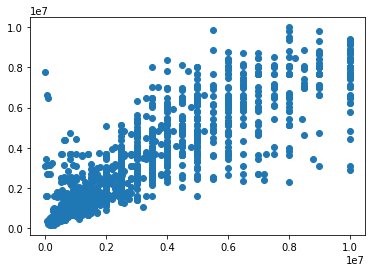

In [86]:
plt.scatter(y_test,rfr.predict(X_test))

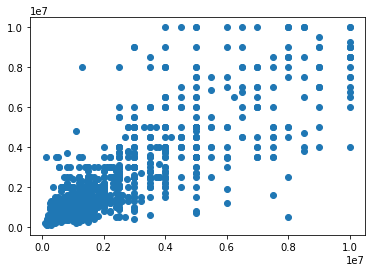

In [347]:
plt.scatter(y_test,dtr.predict(X_test))

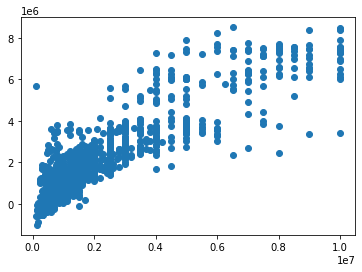

In [348]:
plt.scatter(y_test,lr.predict(X_test))

### Let's predict prices

In [295]:
def predict_price(city,bedroom,bathroom,toilet):
    loc_index = np.where(X.columns==city)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bedroom
    x[1] = bathroom
    x[2] = toilet
    if loc_index >= 0 :
        x[loc_index] = 1
        
    return rfr.predict([x])[0]

In [296]:
predict_price('Lekki',1,1,1)

1397002.368823269

In [297]:
predict_price('Ikoyi',4,4,5)

8940685.20660626

### Exporting the model to disk

In [197]:
import pickle
with open('Lagos_properties_price_model.pickle','wb') as f:
    pickle.dump(rfr, f)

In [ ]:
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["surface_covered_in_m2"].min(),
        max=X_train["surface_covered_in_m2"].max(),
        value=X_train["surface_covered_in_m2"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    neighborhood=Dropdown(options=sorted(X_train["neighborhood"].unique())),
);